<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/TinyMLsineModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Dependencies

In [ ]:
!pip install tensorflow==2.0

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.5.0


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

#### Generating the Data

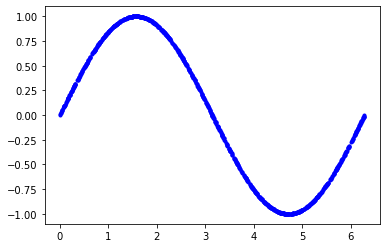

In [13]:
SAMPLES = 1000

SEED = 1337

np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate a uniformly distributed set of random in the range from 
# 0 to 2n, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Caluculate the corresponding sinve values
y_values = np.sin(x_values)

# Plot our data. The 'b.' argument tell the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

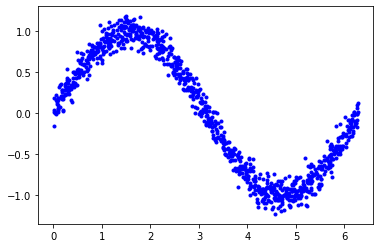

In [14]:
# Add a small random number to each y value
y_values +=0.1*np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

### Spliting the Data

In [15]:
TRAIN_SPLIT = int(0.6*SAMPLES)
TEST_SPLIT = int(0.2*SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data three part
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES
assert (y_train.size + y_validate.size + y_test.size) == SAMPLES

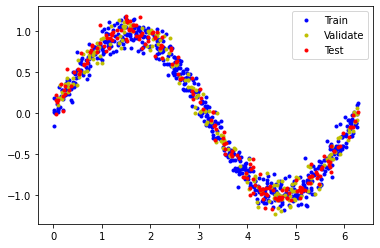

In [34]:
# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

In [ ]:
#### Define the basic model

In [17]:
from keras.models import Sequential
from keras.layers import Dense

model_1 = Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(Dense(16, activation='relu', input_shape=(1,)))
# Final layer is a single neuron, since we want to output a single value
model_1.add(Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Print a summary of the model's architecture
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data=(x_validate, y_validate))

In [19]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

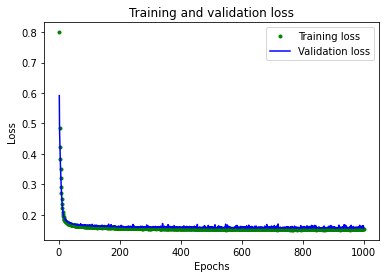

In [20]:
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

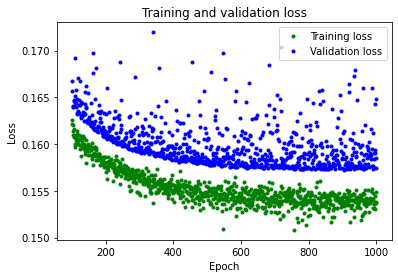

In [21]:
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

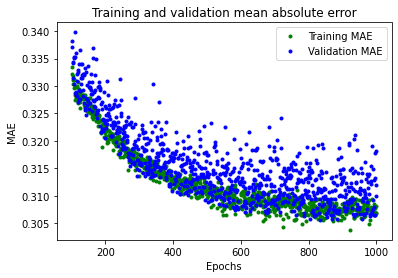

In [23]:
#Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

### Prediction

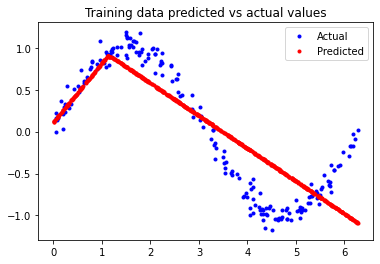

In [28]:
predictions = model_1.predict(x_train)

plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

#### Improving Our Model

In [35]:
model_2 = Sequential()

model_2.add(Dense(16, activation='relu', input_shape=(1,)))

model_2.add(Dense(16, activation='relu'))

model_2.add(Dense(1))

model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [36]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,
validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 [==============================] - 1s 9ms/step - loss: 0.4384 - mae: 0.5885 - val_loss: 0.3920 - val_mae: 0.5459
Epoch 2/600
38/38 [==============================] - 0s 2ms/step - loss: 0.3520 - mae: 0.5127 - val_loss: 0.3286 - val_mae: 0.4914
Epoch 3/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2861 - mae: 0.4626 - val_loss: 0.2527 - val_mae: 0.4334
Epoch 4/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2209 - mae: 0.4146 - val_loss: 0.2083 - val_mae: 0.3970
Epoch 5/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1856 - mae: 0.3803 - val_loss: 0.1749 - val_mae: 0.3655
Epoch 6/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1664 - mae: 0.3607 - val_loss: 0.1609 - val_mae: 0.3472
Epoch 7/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1569 - mae: 0.3507 - val_loss: 0.1507 - val_mae: 0.3383
Epoch 8/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1382 - m

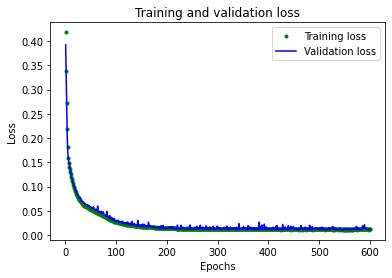

In [39]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

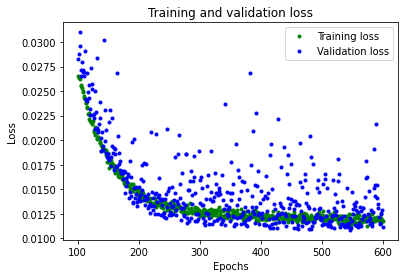

In [40]:
SKIP = 100
plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step - loss: 0.0092 - mae: 0.0748


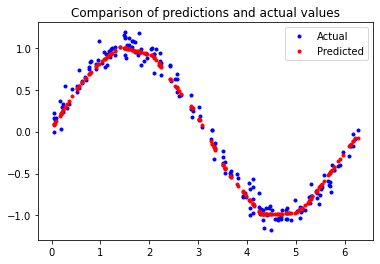

In [37]:
loss = model_2.evaluate(x_test, y_test)
# Make predictions based on our test dataset
predictions = model_2.predict(x_test)
# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

### Converting the Model for TensorFlow Lite

INFO:tensorflow:Assets written to: /tmp/tmpe7cmziu5/assets


INFO:tensorflow:Assets written to: /tmp/tmpe7cmziu5/assets


#### Using pickle

In [50]:
import pickle
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()
# Save the model to disk
filename = 'sine_model.tflite'
pickle.dump(tflite_model, open(filename, 'wb'))
#open("sine_model.tflite," "wb").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations,
# which include quantization

converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in x_test:
  # Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()
# Save the model to disk

pickle.dump(tflite_model, open("sine_model_quantized.tflite", "wb"))

INFO:tensorflow:Assets written to: /tmp/tmp5swp1ga9/assets


INFO:tensorflow:Assets written to: /tmp/tmp5swp1ga9/assets


INFO:tensorflow:Assets written to: /tmp/tmpdi1s7e0g/assets


INFO:tensorflow:Assets written to: /tmp/tmpdi1s7e0g/assets


#### Using tf lite

In [54]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()
# Save the model to disk
with open("sine_model.tflite", "wb") as f:
  f.write(tflite_model)
# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations,
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in x_test:
  # Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()
# Save the model to disk
with open("sine_model_quantized.tflite", "wb") as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpplpnn2ho/assets


INFO:tensorflow:Assets written to: /tmp/tmpplpnn2ho/assets


INFO:tensorflow:Assets written to: /tmp/tmpqq68969o/assets


INFO:tensorflow:Assets written to: /tmp/tmpqq68969o/assets


In [56]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')
# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()
# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = \
  sine_model_quantized.get_output_details()[0]["index"]
# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []
# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
  # Create a 2D tensor wrapping the current x value
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
  # Write the value to the input tensor
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  # Run inference
  sine_model.invoke()
  # Read the prediction from the output tensor
  sine_model_predictions.append(
    sine_model.get_tensor(sine_model_output_index)[0])
  # Do the same for the quantized model
  sine_model_quantized.set_tensor\
    (sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(
    sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

<Figure size 432x288 with 0 Axes>

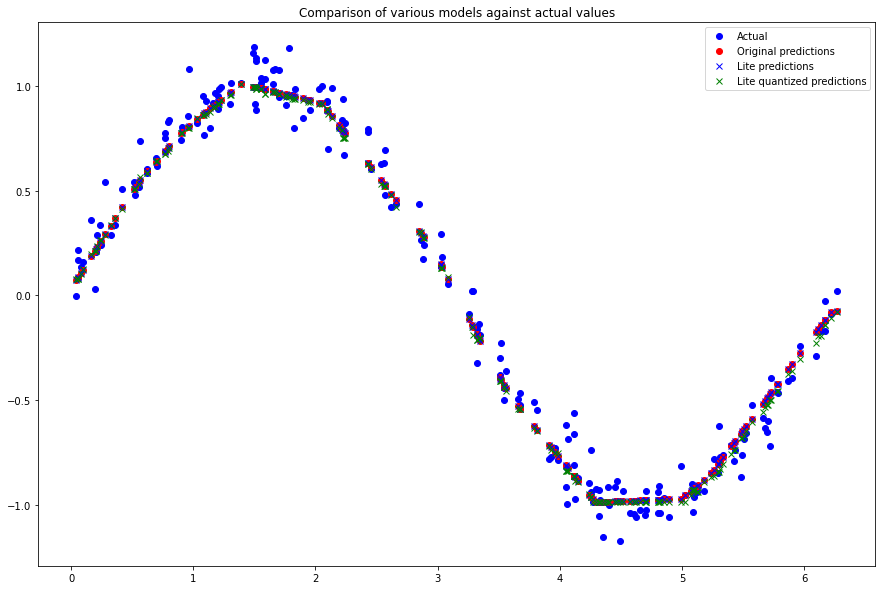

In [58]:
# See how they line up with the data
plt.clf()
plt.figure(figsize=(15,10))
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', \
label='Lite quantized predictions')
plt.legend()
plt.show()

### Compare the size of two models

In [60]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 2912 bytes
Quantized model is 2712 bytes
Difference is 200 bytes


### Converting to a C file

In [62]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
# Print the source file
!cat sine_model_quantized.cc

unsigned char sine_model_quantized_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00,
  0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00,
  0xb8, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00, 0x60, 0x00, 0x00, 0x00,
  0x58, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x98, 0x04, 0x00, 0x00,
  0xa0, 0x03, 0x00, 0x00, 0x68, 0x01, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0xb8, 0x00, 0x00, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x38, 0x0a, 0x00, 0x00,
  0x34, 0x0a, 0x00, 0x00, 0x2c, 0x09, 0x00, 0x00, 0x58, 0x08, 0x00, 0x00,
  0xe0, 0x06, 0x00, 0x00, 0x10, 0x06, 0x00, 0x00, 0x88, 0x05, 0x00, 0x00,
  0xf4, 0x04, 0x00, 0x00, 0x18, 0x0a, 0x00, 0x00, 0x14, 0x0a, 0x00, 0x00,
  0x10, 0x0a, 0x00, 0x00, 0x0c, 0x0a, 0x00, 0x00, 0x08, 0x0a, 0x00, 0x00,
  0x3c, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x01, 0x00, 0x